In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [11]:
tickers=["KO", "PEP"]
data= yf.download(tickers, start="2010-1-1",end="2025-7-26")

C:\Users\ceiro\AppData\Local\Temp\ipykernel_42064\148027554.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data= yf.download(tickers, start="2010-1-1",end="2025-7-26")
[*********************100%***********************]  2 of 2 completed


<function matplotlib.pyplot.show(close=None, block=None)>

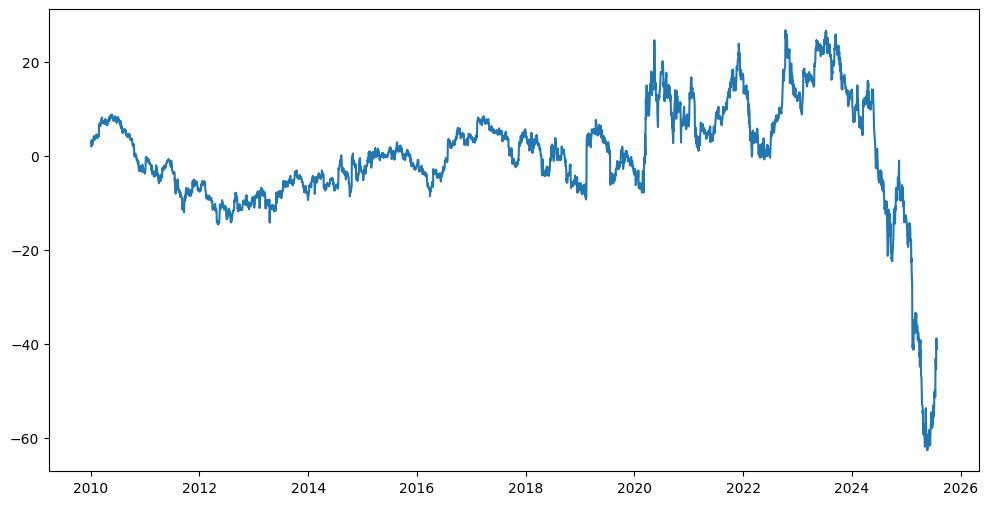

In [14]:
ko_price=data["Close"]["KO"]
pep_price=data["Close"]["PEP"]
X=sm.add_constant(ko_price)
model = sm.OLS(pep_price,X).fit()
spread=model.resid

plt.figure(figsize=(12,6))
plt.plot(spread,label="somethin")
plt.show

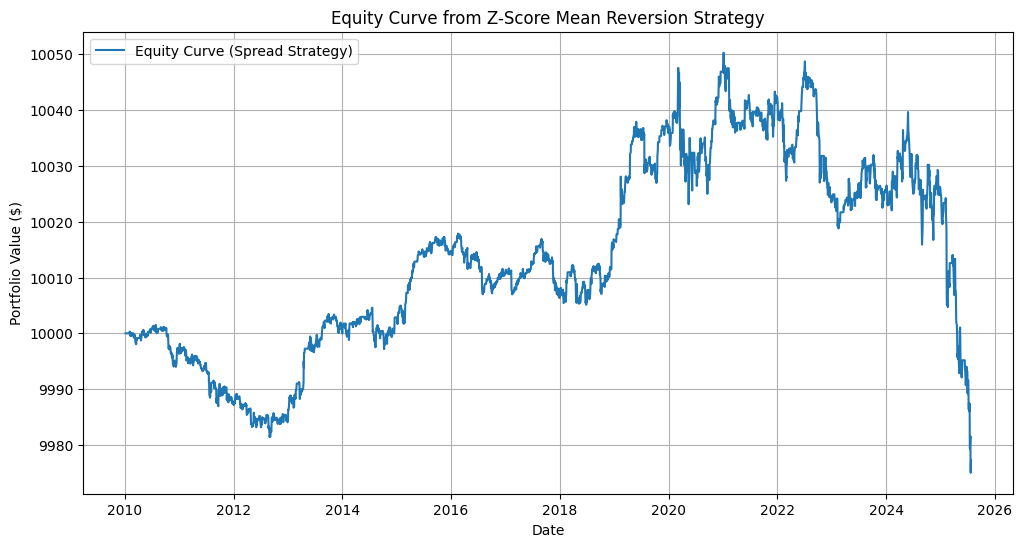

In [24]:
z_score=(spread-spread.rolling(window=20).mean())/ spread.rolling(window=20).std()
signal=pd.Series(index=spread.index,dtype='float64')
signal[z_score < -1] = 1     # Long spread
signal[z_score > 1] = -1     # Short spread
signal[abs(z_score)<0.2]=0
signal = signal.ffill().fillna(0)
spread_return = spread.diff()

# Step 6: Strategy return (lag signal to avoid lookahead bias)
strategy_return = signal.shift(1) * spread_return

# Step 7: Equity curve
initial_capital = 10000
equity_curve = initial_capital + strategy_return.cumsum()

# Step 8: Plot
plt.figure(figsize=(12, 6))
plt.plot(equity_curve, label='Equity Curve (Spread Strategy)')
plt.title('Equity Curve from Z-Score Mean Reversion Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()